### Predictive maintennace 
Description from [Kaggle:]('https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset')
A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to Predict is called failure with binary value 0 for non-failure and 1 for failure.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('predictive_maintenance_dataset.csv')
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
metric1,124494.0,1.223881e+08,7.045933e+07,0.0,61284762.0,122797388.0,183309640.0,244140480.0
metric2,124494.0,1.594927e+02,2.179678e+03,0.0,0.0,0.0,0.0,64968.0
metric3,124494.0,9.940897e+00,1.857481e+02,0.0,0.0,0.0,0.0,24929.0
metric4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
metric5,124494.0,1.422267e+01,1.594303e+01,1.0,8.0,10.0,12.0,98.0
metric6,124494.0,2.601727e+05,9.915108e+04,8.0,221452.0,249799.5,310266.0,689161.0
metric7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric9,124494.0,1.301385e+01,2.756612e+02,0.0,0.0,0.0,0.0,70000.0


In [5]:
data.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

- Dataset is very unbalanced. 
- Check the duplicates 

In [17]:
print(data.device.value_counts())
print(len(data.device.value_counts()))

Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64
1169


There are only 1169 unique devices in whole dataset of app. 124500 entries. This could mean that:

    - some devices are repaired several times already, but for that would be interesting to see when, or what were the metrics which indicated failure? 
    - Metric7 and metric8 seem to be indentical, maybe one needs to be removed?   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [4]:
data = data.drop('metric8', axis=1)

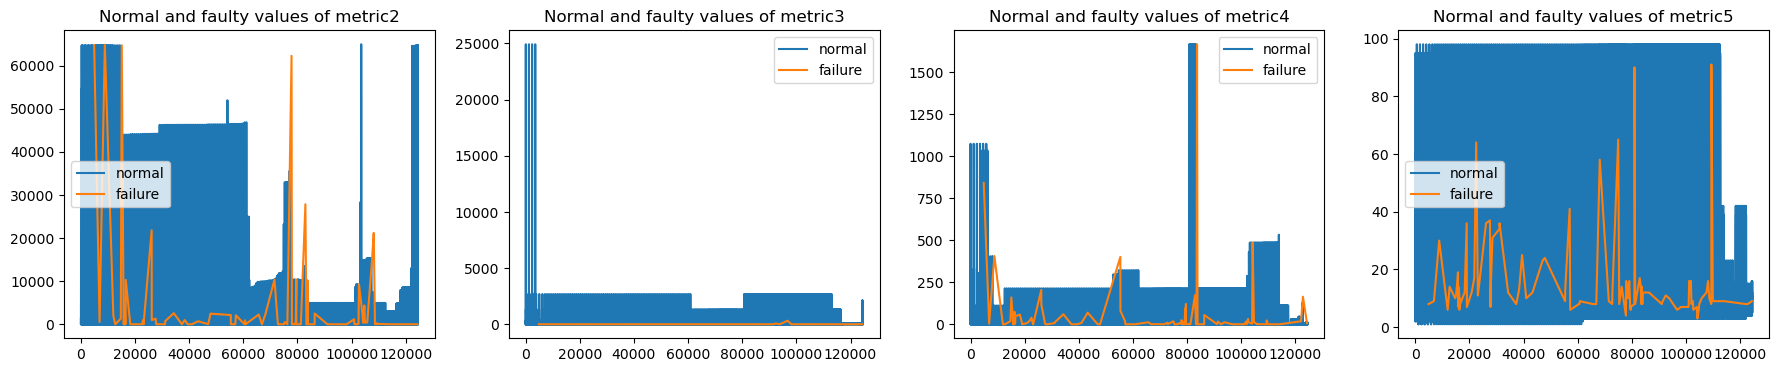

In [13]:
#divide the sheet in those without failures and those with it and check distribution of features.
normal = data[data['failure']==0]
failure = data[data['failure']==1]
#nums = data.select_dtypes(include=int)
#sns.pairplot(nums, hue='failure', diag_kind='kde')
#plt.show()

sparse = ['metric2', 'metric3', 'metric4', 'metric5']

fig, ax = plt.subplots(1,4, figsize=(22,4))

for m in range(len(sparse)):
    normal[sparse[m]].plot(label='normal', ax= ax[m])
    failure[sparse[m]].plot(label='failure', ax=ax[m])
    ax[m].set_title('Normal and faulty values of {}'.format(sparse[m]))
    ax[m].legend()
plt.show()


From the slides is not possible to see anything what would clearly separate normal from faulty machines. Distributions of metrics values are similar. Maybe the metric 3 shows some difference, where faulty machines have only 0 values while normal ones have 0 and other values.  

<ipython-input-199-6bae97c33bf9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


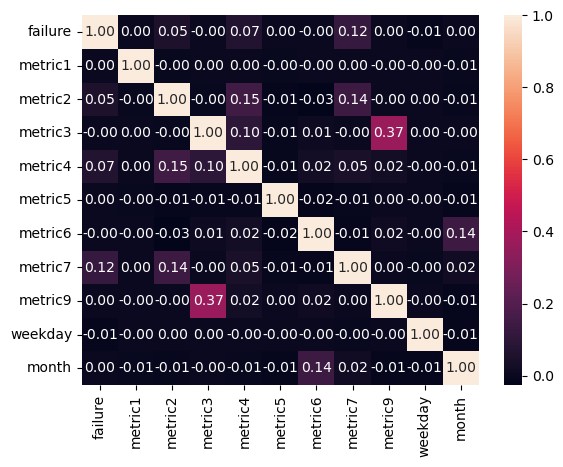

In [199]:

corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

There is no correlation between the numerical values in dataset. There is weak correlation between metric3 and metric9 and that is not worth investigating 

In [14]:
data['date'] = pd.to_datetime(data['date'])
data['weekday']=data['date'].dt.weekday
data['month'] = data['date'].dt.month

In [49]:
#just in first month, we need the column active days 
first_date =data['date'].min()

data['active_days'] = data.date - first_date


we need to check if machine got failure and then if it is repaired, we need separate df for that only for devices which have active days >0, and we need to find a way to say if machine got failure or not. if for specific machine max date is higher than the date of failure, machine got back to production after repair. 

In [72]:
df_max_date = data.groupby('device')['date'].max().reset_index(name='max_utility_date')
print(df_max_date.head())
print(df_max_date.shape[0])

     device max_utility_date
0  S1F01085       2015-01-06
1  S1F013BB       2015-05-11
2  S1F0166B       2015-01-06
3  S1F01E6Y       2015-02-17
4  S1F01JE0       2015-01-06
1169


In [78]:
data = pd.merge(data, df_max_date, how='left', on='device')

In [289]:
#check how many times are machines fixed ?

norm = data.loc[data.failure==0, ['date', 'failure','device', 'month','max_utility_date']]
fail = data.loc[data.failure==1, ['device', 'failure','date','month', 'max_utility_date']]

fail_devices = fail.device.to_list()
np.unique(fail_devices, return_counts=True)

(array(['S1F023H2', 'S1F03YZM', 'S1F09DZQ', 'S1F0CTDN', 'S1F0DSTY',
        'S1F0F4EB', 'S1F0GG8X', 'S1F0GJW3', 'S1F0GKFX', 'S1F0GKL6',
        'S1F0GPFZ', 'S1F0GSD9', 'S1F0GSHB', 'S1F0J5JH', 'S1F0JD7P',
        'S1F0JGJV', 'S1F0L0DW', 'S1F0LCTV', 'S1F0LCVC', 'S1F0LD15',
        'S1F0LD2C', 'S1F0P3G2', 'S1F0PJJW', 'S1F0QF3R', 'S1F0QY11',
        'S1F0RR35', 'S1F0RRB1', 'S1F0RSZP', 'S1F0S2WJ', 'S1F0S4CA',
        'S1F0S4EG', 'S1F0S4T6', 'S1F0S57T', 'S1F0S65X', 'S1F0T2LA',
        'S1F0TQCV', 'S1F10E6M', 'S1F11MB0', 'S1F13589', 'S1F135TN',
        'S1F136J0', 'S1F13H80', 'W1F03D4L', 'W1F03DP4', 'W1F08EDA',
        'W1F0F6BN', 'W1F0FKWW', 'W1F0FW0S', 'W1F0GCAZ', 'W1F0KCP2',
        'W1F0M35B', 'W1F0M4BZ', 'W1F0NZZZ', 'W1F0P114', 'W1F0PAXH',
        'W1F0PNA5', 'W1F0Q8FH', 'W1F0SGHR', 'W1F0T034', 'W1F0T074',
        'W1F0T0B1', 'W1F0TA59', 'W1F0VDH2', 'W1F0WBTM', 'W1F0X4FC',
        'W1F0X5GW', 'W1F0Z1W9', 'W1F0Z3KR', 'W1F0Z4EA', 'W1F11ZG9',
        'W1F1230J', 'W1F13SRV', 'W1F14XGD', 'W1F

Each device failed only once.

In [287]:
#len(fail[fail['date']< fail['max_utility_date']]) # only 5 devices are fixed and put back to production 
fixed_devices = fail[fail['date']< fail['max_utility_date']]
fixed=fixed_devices['device'].to_list()
fixed

['S1F136J0', 'W1F0KCP2', 'W1F0M35B', 'S1F0GPFZ', 'W1F11ZG9']

In [200]:
def plot_device_operation(df, device_number):
    device_df = df.loc[df['device']==device_number][['failure', 'date', 'month']]
    #print(device_df)
    fig = plt.figure(figsize=(8,2)) 
    if device_df['month'].max()== device_df['date'].max().month:
        plt.plot(device_df['date'], device_df['failure'], label= device_number)
        plt.xticks(rotation=45)
        
    else:
        plt.plot(device_df['month'], device_df['failure'], label=device_number)
    plt.legend()
    plt.show()
    
     

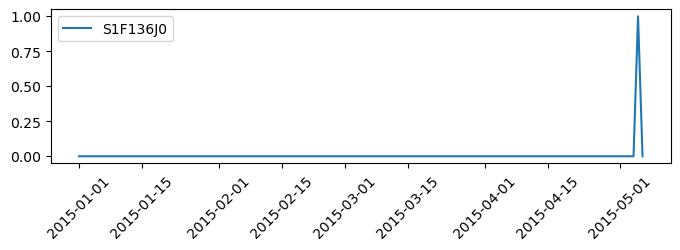

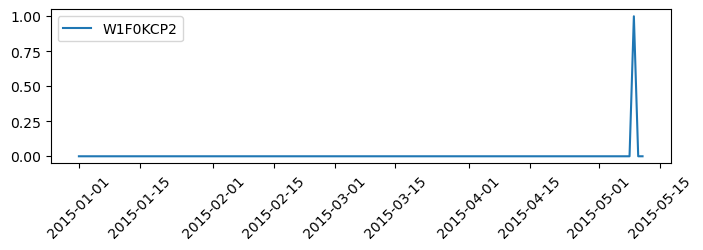

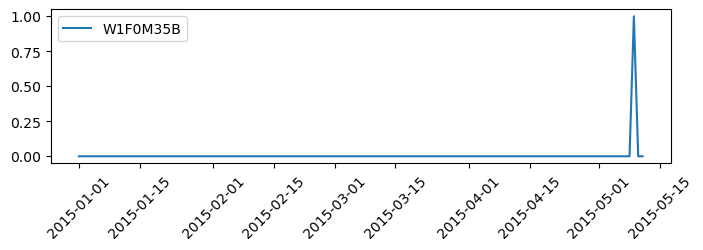

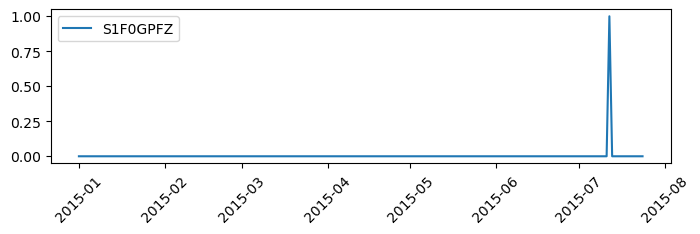

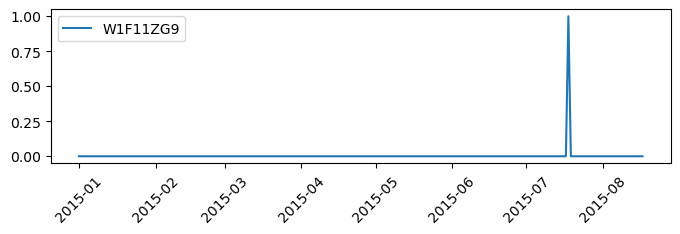

In [201]:

for i in range(len(fixed)):
    
    plot_device_operation(data, fixed[i])

Only last 2 machines were put back to production after fix, and were working longer than just one day. We will add this as additional column once we reduced dataset to only contains unique devices.

In [80]:
data.drop('max_date', inplace=True, axis=1)

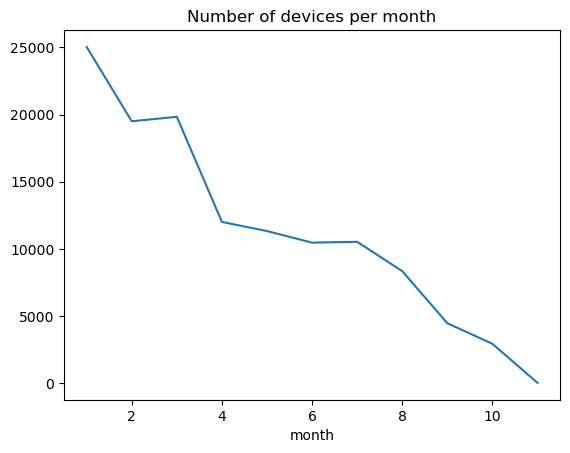

In [206]:
per_month = data.groupby('month')['failure'].count()
per_month.plot()   
plt.title('Number of devices per month') 
plt.show()

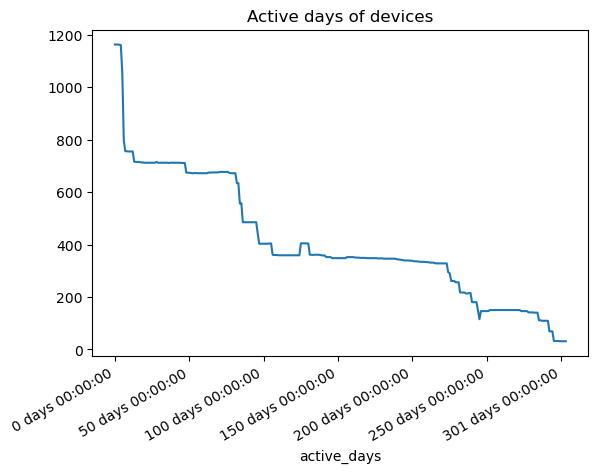

In [82]:
days_group = data.groupby('active_days')['device'].count()
days_group.plot()
plt.title('Active days of devices')
plt.show()
#highest number of active days is 0 because all devices started from day 0

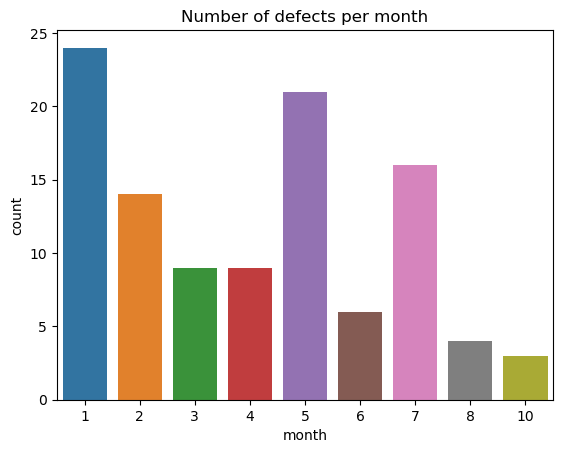

In [205]:
sns.countplot(data=fail, x='month')
plt.title('Number of defects per month')
plt.show()

### Data Preparation

In [231]:
#select features, standardize, and start with logistic regression, use as metrics ROC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report


In [252]:
df1 = data.groupby('device')['date'].max()
print(df1.shape)
print(df1.head())

(1169,)
device
S1F01085   2015-01-06
S1F013BB   2015-05-11
S1F0166B   2015-01-06
S1F01E6Y   2015-02-17
S1F01JE0   2015-01-06
Name: date, dtype: datetime64[ns]


In [253]:
df= pd.merge(df1, data, how='left', on=['date', 'device'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   date              1169 non-null   datetime64[ns] 
 1   device            1169 non-null   object         
 2   failure           1169 non-null   int64          
 3   metric1           1169 non-null   int64          
 4   metric2           1169 non-null   int64          
 5   metric3           1169 non-null   int64          
 6   metric4           1169 non-null   int64          
 7   metric5           1169 non-null   int64          
 8   metric6           1169 non-null   int64          
 9   metric7           1169 non-null   int64          
 10  metric9           1169 non-null   int64          
 11  weekday           1169 non-null   int64          
 12  month             1169 non-null   int64          
 13  active_days       1169 non-null   timedelta64[ns]
 14  max_util

In [254]:
#we could use device number, dates should be removed, active days, month, weekday changed to object , active days should be transformed to int
for d in ['weekday', 'month']:
    df[d]=df[d].astype('object')

In [255]:
df['is_fixed'] = df['device'].apply(lambda x: 1 if x in fixed else 0 )

In [256]:
df.is_fixed.value_counts()

0    1164
1       5
Name: is_fixed, dtype: int64

In [257]:
df['active_days']=df['active_days'].dt.days

In [258]:
#let's leave the dates 
label = df['failure']
features = df.drop(['failure', 'date', 'max_utility_date'], axis=1)

features = pd.get_dummies(features, drop_first=True)
print(features.head())
print(features.shape)

     metric1  metric2  metric3  metric4  metric5  metric6  metric7  metric9  \
0  128832128       56        0       52        6   409404        0        7   
1  115676688        0        0        0        5   689161        0        0   
2    7441792        0        3        0        6   404786        0        0   
3  147350000        0        0        0       12   259491        0        0   
4  185424928        0        0        0        6   412151        0        0   

   active_days  is_fixed  ...  month_2  month_3  month_4  month_5  month_6  \
0            5         0  ...        0        0        0        0        0   
1          130         0  ...        0        0        0        1        0   
2            5         0  ...        0        0        0        0        0   
3           47         0  ...        1        0        0        0        0   
4            5         0  ...        0        0        0        0        0   

   month_7  month_8  month_9  month_10  month_11  
0    

<ipython-input-258-73fd0756594f>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  features = pd.get_dummies(features, drop_first=True)
<ipython-input-258-73fd0756594f>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  features = pd.get_dummies(features, drop_first=True)


In [263]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state=3, stratify=label)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [264]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
print(clf_score)
print(confusion_matrix(y_test, y_pred))


0.9102564102564102
[[212   2]
 [ 19   1]]


Since the dataset is extremely unbalanced, as per model there are almoust no true negatives, or true failure defects which is wrong. 

In [290]:
roc_score = roc_auc_score(y_test, y_pred)
print(roc_score)

0.5203271028037383


ROC score shows that classifier is not able to properly distinguish if machine has failure or not. When we look the confusion matrix we see that almoust all true positives are correctly classified, but only one true negative.

In [267]:
from sklearn.ensemble import RandomForestClassifier
r_tree = RandomForestClassifier()
r_tree.fit(x_train, y_train)
r_tree_score= r_tree.score(x_test, y_test)
y_tree_pred = r_tree.predict(x_test)
pd.crosstab(y_test, y_tree_pred, rownames=['true'], colnames=['predictions'])

predictions,0,1
true,,
0,214,0
1,16,4


Random Forest classifier brings lightly better results, still the number of correctly classified negative class is lower than size of false positives. 

In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       214
           1       0.33      0.05      0.09        20

    accuracy                           0.91       234
   macro avg       0.63      0.52      0.52       234
weighted avg       0.87      0.91      0.88       234



In [273]:
#what will happen if we build classifier but without devices as features?
feat_short = df.drop(['failure', 'date', 'max_utility_date', 'device'], axis=1)
np.unique(label, return_counts=True)

(array([0, 1]), array([1068,  101]))

We will try below again Random Forest classifier, this time without devices as features.

In [274]:
feat_short = pd.get_dummies(feat_short, drop_first=True)
feat_short.shape

<ipython-input-274-15f6d04331a1>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  feat_short = pd.get_dummies(feat_short, drop_first=True)
<ipython-input-274-15f6d04331a1>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  feat_short = pd.get_dummies(feat_short, drop_first=True)


(1169, 26)

In [282]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feat_short, label, test_size=0.3, stratify=label)
scaler1 = StandardScaler()
x1_train = scaler1.fit_transform(x1_train)
x1_test = scaler1.transform(x1_test)
rfc = RandomForestClassifier()
rfc.fit(x1_train, y1_train)
rfc_score=rfc.score(x1_test, y1_test)
y_rfc_pred = rfc.predict(x1_test)

rfc_score
pd.crosstab(y1_test, y_rfc_pred, rownames=['True'], colnames=['predictions'])

predictions,0,1
True,,
0,318,3
1,9,21


In [283]:
roc_score_tree = roc_auc_score(y1_test, y_rfc_pred)
roc_score_tree

0.8453271028037384

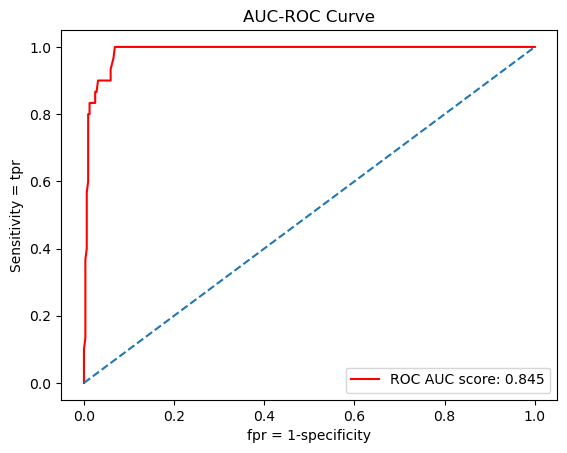

In [291]:
proba = rfc.predict_proba(x1_test)
fpr, tpr, thresholds = roc_curve(y1_test, proba[:,1]) # we are checking probabilities of 2nd class 
plt.plot(fpr,tpr, color = 'red', label='ROC AUC score: {}'.format(round(roc_score_tree, 3)))
plt.plot([0,1], [0,1], linestyle='--')
plt.title('AUC-ROC Curve')
plt.xlabel('fpr = 1-specificity')
plt.ylabel('Sensitivity = tpr')
plt.legend()
plt.show()

We could try algorithm suitable for anomaly detection and see how it performs on this task.

In [292]:
from sklearn.ensemble import IsolationForest

df['failure'] = np.where(df['failure']==0,1,-1)
label1 = df['failure']

In [297]:
label1.value_counts(normalize=True)

 1    0.913601
-1    0.086399
Name: failure, dtype: float64

In [298]:
iso = IsolationForest(contamination=0.09)

x2_train, x2_test, y2_train, y2_test=train_test_split(feat_short, label1, test_size=0.2, random_state=44)
scaler2 = StandardScaler()
x2_train = scaler2.fit_transform(x2_train)
x2_test = scaler2.transform(x2_test)

iso.fit(x2_train, y2_train)
y2_pred = iso.predict(x2_test)

pd.crosstab(y2_test, y2_pred, rownames=['true'], colnames=['predictions'])


predictions,-1,1
true,,
-1,11,11
1,17,195


Contamination parameter for Isolation Forest is quite important, therefore we need to define the number of outlier in dataset upfront, otherwise classifier won't have satisfactory results.
For the next step we could build gridsearch cross- validation for predefined parameters like contamination or n_estimators, define the scorer, which in this case would be recall and use the best result